In [1]:
import dimod
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 3
E = 7

data = {}
feasible_data = {}
energies = {}

def parse_feasible(sampleset):
        print("parsing best ...")
        best = sampleset.filter(lambda row: row.is_feasible)
        print("found best")
        return best

for e in range(E):
    for r in range(R):
        with open(f"results_1000scenarios_{r}rho_{e}epsilon.json", "r") as f:
            data[r,e] = dimod.SampleSet.from_serializable(json.load(f))
            feasible_data[r,e] = parse_feasible(data[r,e])
            energies[r,e] = np.sort(feasible_data[r,e].record.energy)




# Define reliability values
reliability = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize containers for plot data
plot_data = {r: {'avg': [], 'min': [], 'max': []} for r in range(R)}

for r in range(R):
    for e in range(E):
        sorted_energies = energies[r, e]
        if len(sorted_energies) >= 5:
            top5 = sorted_energies[:5]
        else:
            top5 = sorted_energies  # fallback in case <5 values
        
        avg_val = np.mean(top5)
        min_val = np.min(top5)
        max_val = np.max(top5)

        plot_data[r]['avg'].append(avg_val)
        plot_data[r]['min'].append(min_val)
        plot_data[r]['max'].append(max_val)

parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best
parsing best ...
found best


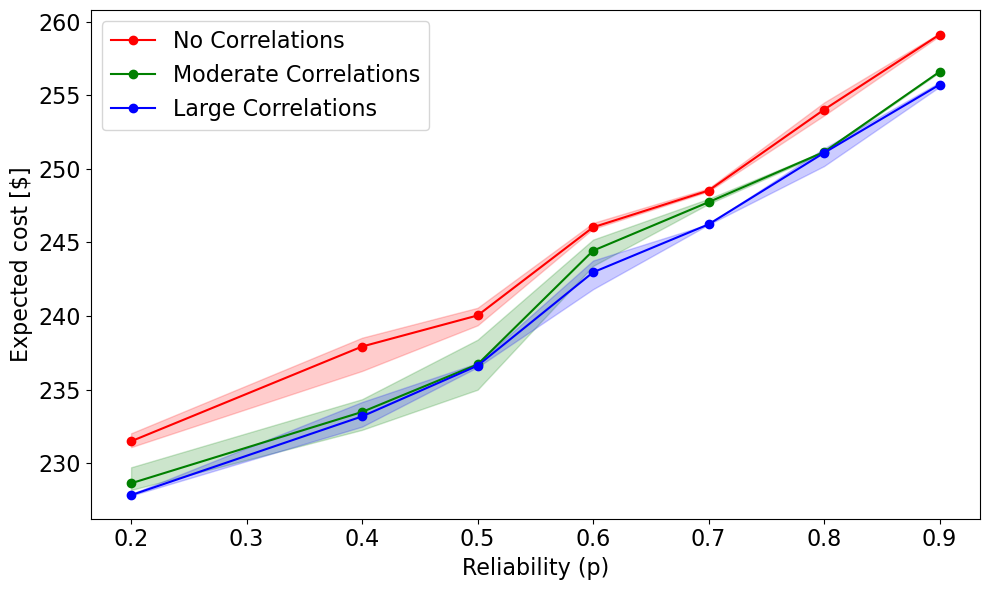

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
labels = [r'No Correlations', r'Moderate Correlations', r'Large Correlations']

for r in range(R):
    avg = np.array(plot_data[r]['avg'])
    min_ = np.array(plot_data[r]['min'])
    max_ = np.array(plot_data[r]['max'])

    plt.plot(reliability, avg, "o-", label=labels[r], color=colors[r])
    plt.fill_between(reliability, min_, max_, color=colors[r], alpha=0.2)

plt.xlabel("Reliability (p)", fontsize = 16)
plt.ylabel("Expected cost [$]", fontsize = 16)
plt.tick_params(axis='both', labelsize=16)
#plt.title("Energy vs Reliability for Different ρ")
#plt.grid(True)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig("plot_cost_vs_reliability_Dwave.pdf")
plt.show()

In [2]:
with open(f"results_1000scenarios_0rho_0epsilon.json", "r") as f:
    sampleset = dimod.SampleSet.from_serializable(json.load(f))

keys = sampleset.record.dtype.names
print(keys)



('sample', 'energy', 'num_occurrences', 'is_satisfied', 'is_feasible')
